**HOTEL BOOKING**

***End-to-End Project for Portfolio***

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #to ignore warnings from getting displayed

**Loading the dataset**

In [2]:
df = pd.read_csv('/kaggle/input/hotel-booking/hotel_booking.csv')

**Exploratory Data Analysis and Data Cleaning**

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [5]:
df.shape

(119390, 36)

In [6]:
df.drop(columns=['name','email','phone-number','credit_card'],axis = 1,inplace = True)
#we removed column which contains customers personal details bec when we work in real world dataset in company they won't give details of their customer

In [7]:
df.head(2)
#is_canceled where 0(False) represents that there is no cancellation done
#1(True) represents that reservation is cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [8]:
df.shape #119390 r,32 c

(119390, 32)

In [9]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**we will convert object dtype into datetime dtype of 'reservation_status_date' column**

In [11]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [13]:
df.describe(include = 'object')
#WKT describe fun is used for numerical columns only , but there is a parameter called 'include' if you put object in include then you will get a summary statistics of all object columns
#we can see that we have 2 unquie values in hotel column,5 unique values in meal etc

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


**for categorical columns also we can see how many unique values are there or u can see how many categories are there in which categorical column.So,that is wat we have done using df.describe...**

**Now the number is known to us that we have these many unique values in a partcular column,but it is also necessary to see which are the values that are coming in these categories.So,for this we have to run a for loop on those columns which is of object type we can get it from above df.describe.. which is returning only object column then we will print col & then unique values of the columns**

In [14]:
#to display unique values of each column
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique()) #unique fun can be used with any col in the dataframe
    print('-'*70) #to make it clearly visible we are adding a line after every category
    #70 is just a no for dotted lines len u can give 50 or any no,* means after every cat

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LK

**We can see that in hotel ,there are 2 values,resort hotel & city hotel,in arrival date month july,'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June' i.e 12 values ,etc are the unique values per columns**
 
 **In market_segment col TA stands for travel agent,offline TA/TO where TO means Tour Operators,direct means they are coming directly to the hotel and making their bookings done(reservation)**
 
 **In reservation_status col 'No-Show means neither they came nor did they cancel there booking**

In [15]:
#to check missing values
df.isnull().sum() #we can see there are 4 columns having missing values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**WKT,our that also contains 119390 rows(1lakh+) & if we will that the missing that of company col then it will be very hetic so we will remove both the cols agent & company bec it is not possible to handle these many missing values & agent column we don't require so we will remove it also**

**and in children col we have 4 missing values & in country we have 488 so out 1L+ records around 500 missing values are there then we can also simply drop it**

In [16]:
df.drop(['company','agent'],axis = 1, inplace = True) #dropping cols & to make changes in orig dataframe we will use inplace=True
df.dropna(inplace = True) #dropna is used to drop rows which hv null values(missing values)

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
df.describe() #to see summary statistics of numerical columns
#we can see lots of outliers here (0) in many columns , 10children,10babies is not possible in children,babies col,in adr(average daily rate i.e, nothing but price or value of hotel) col -6 & 5400 is the only value(of hotel)very high is a outlier
#if u plot box plot u can see 
#df['adr'].plot(kind = 'box')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: >

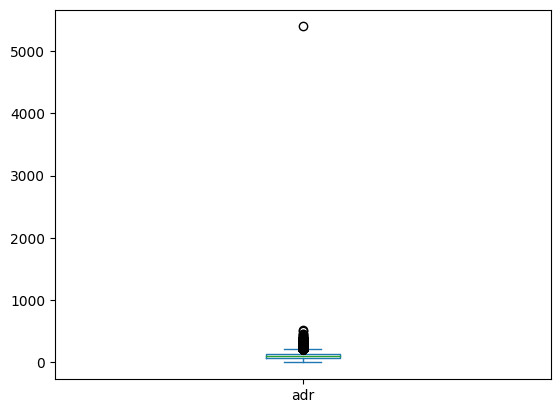

In [19]:
df['adr'].plot(kind = 'box') #oultier at 5400
#we can remove these outlierss but it's optional ,if u want to analyse your data more nicely u can remove the outliers

In [20]:
df = df[df['adr']<5000]
#we r removing all the values which are in df below 5000 in adr

Now lets check if removed or not

In [21]:
df.describe()
#we can see that the max value in adr is now much less than 5400 i.e, 510 now
#adr is the required column that's why we removed the outliers

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


**Data Analysis and Visualizations**

1. **we will see the amt of reservation which has been cancelled & those which have not been cancelled.So, first we will first look at the % of reservation,then count of that in data set whether cancellation is happing in the hotel but what it is how much %**

In [22]:
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)
cancelled_percentage
#value_counts() fun returns the category names & how many times it is present in the col
#if we pass normal ize = True,then it will return %

#NOTE this is just for understanding purpose we can direct do as done below

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

**we can see that 62.8% of the reservation are not cancelled(0-False)& around 37% reservation are cancelled bec u can see in side 1(true) which is more than half**

**Let's visualize it & see**

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

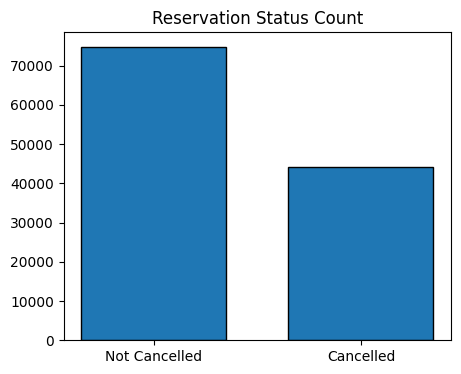

In [23]:
cancelled_percentage = df['is_canceled'].value_counts(normalize = True)
print(cancelled_percentage)

plt.figure(figsize = (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)

**Here also u can see that it is more than half(cancelled ones),so this is a major problem/big issue for the hotels**

2. **Depending on the hotel let's see which hotel's cancellation rate is high**

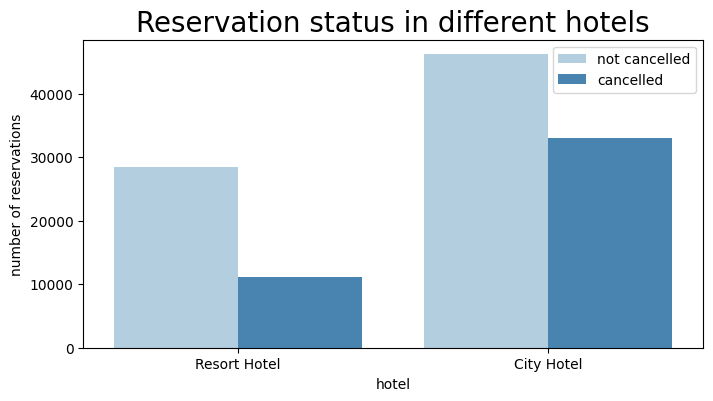

In [24]:
plt.figure(figsize = (8,4))
# count plot on two variable
#if we don't add palette we can add color="salmon" or any specific color instead of palette
ax = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues') #In x-axis we need hotel in bases of is_canceled(on y-axis as we hv to count based on is_canceled)

#The Axes.get_legend_handles_labels() function in axes module of matplotlib library is used to return the handles and labels for legend.
h = ax.get_legend_handles_labels() #note var where u r storing get_legend..can be any h/l,legend_labels
ax.legend(bbox_to_anchor = (1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not cancelled','cancelled'])
#if we don't pass this legend it will show 0,1 which means 0 - not cancelled,1- cancelled
plt.show()

#ax = This parameter take matplotlib Axes, Axes object to draw the plot onto, otherwise uses the current Axes.

**O/P : we can see that in city hotel cancellation rate is high than compared to resort hotels**

**seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars**

**The get_legend_handles_labels() method returns a tuple of two lists, i.e., list of artists and list of labels (python string). However, it does not return all of its child artists. It returns artists that are currently supported by matplotlib.**

In [25]:
#Possible values of palette are:

#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r,

#GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r,

#Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r,

#Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1,

#Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,

#YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,

#cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth,

#gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, 

3. **let's see this rate of cancellation hotel wise in % format** 

In [26]:
#for this we will filter our data on resort hotels & then in the hotel column only filter the resort hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

**We can see that in "Resort Hotel" around 28% reservation is cancelled but 72% are not getting cancelled**
0 - not cancelled,1- cancelled

In [27]:
#for city hotel let's check the % of cancellation
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

**we can see that around 42% of the reservation is getting cancelled which is very high no & 58% are not getting cancelled**

4. **Let's check now is there any effect on the price on cancellation of resort & city hotel**

In [29]:
#for this 1st we need to group by resort hotel on the reservation status date(col) using groupby() bec there are many records on the same day so wat we will do is we will take average daily rate(adr col)of one day record(i.e, it's mean) & same for city hotel
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

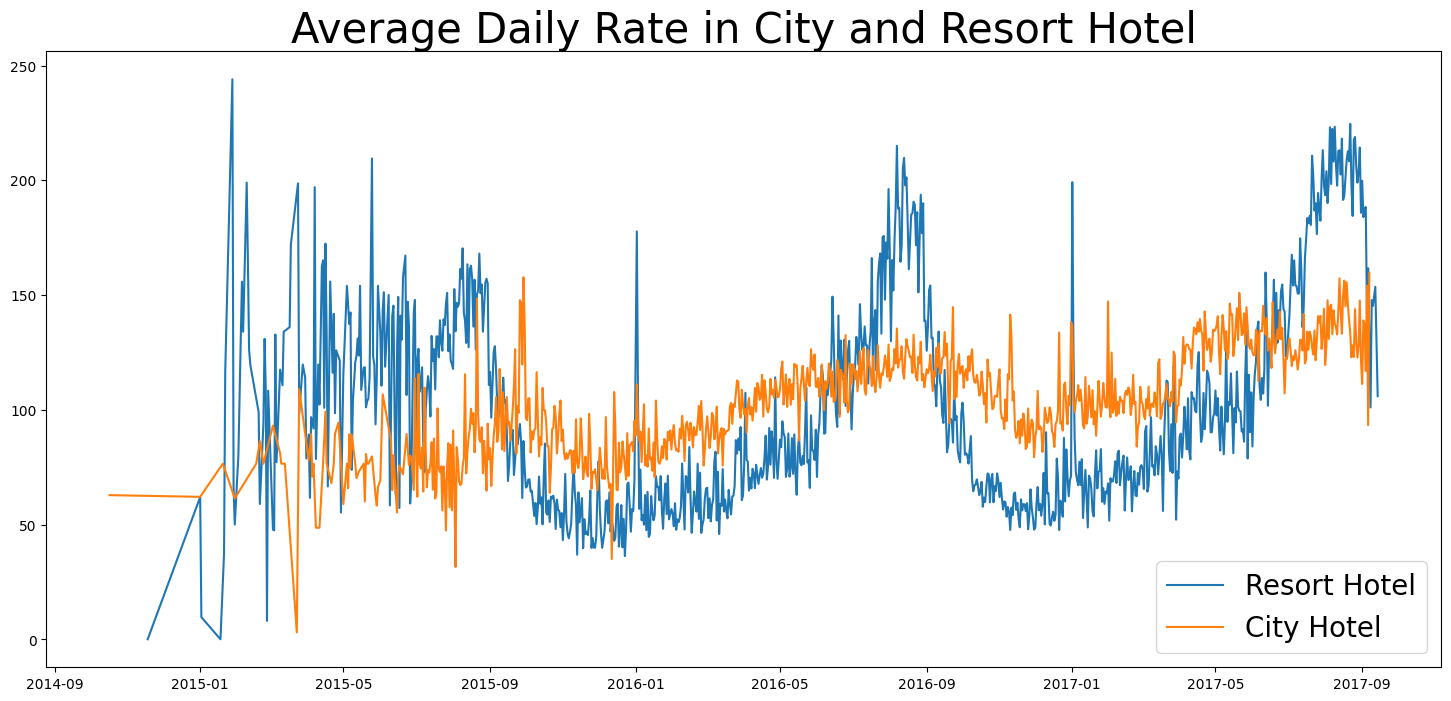

In [30]:
#now we will create visualization for both the hotels
plt.figure(figsize = (18,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel') #NOTE x value will be the index & the index is reservation_status_date & y will be adr-average daily rate
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

From 2016 to 2017 we can see that data is in uniform form,if u see orange line(of city hotel) it is starting from middle of resort hotel adr so, this means **the price of city hotel in comparison with resort hotel is less & for some days(days can be holiday's or weekend) it's more** the high point means more price & that wud be on weekend/holiday 

5. **Let's see in which month we can see more (max) reservations & max cancellation**

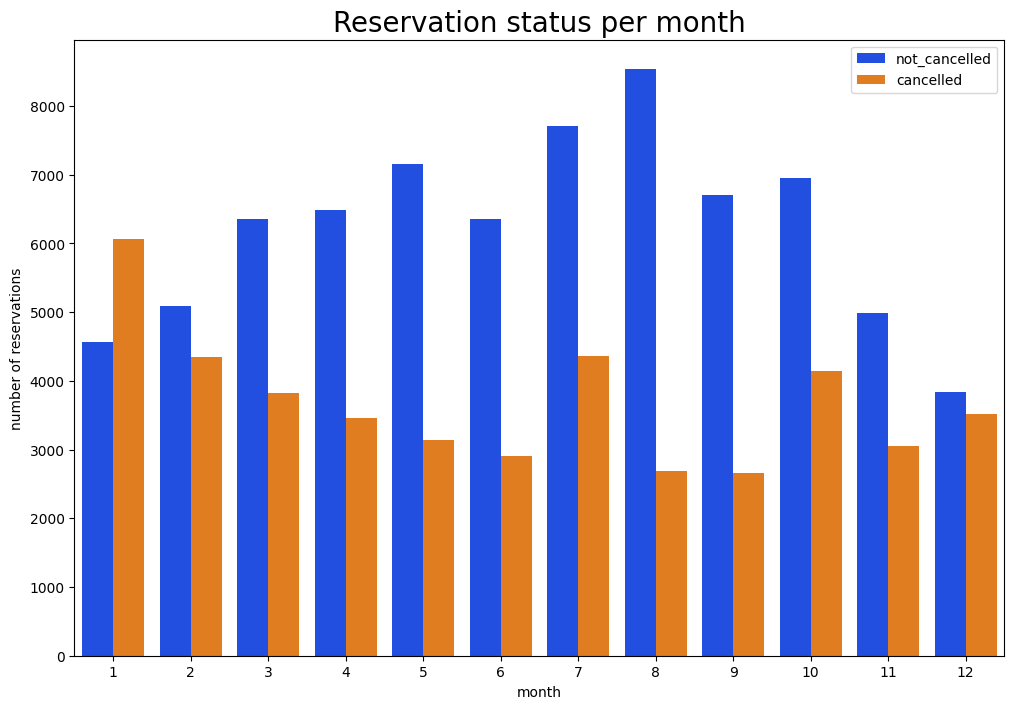

In [31]:
#here also we will use countplot bec we need a grouped bar chart on months which represent cancelled/not cancelled (reservation counts) so we can compare that with month
#in x-axis we need months but we don't hv any col by month for reservation status date but if u remember we had converted this to date time so we can extract a data from it by means of month
df['month'] = df['reservation_status_date'].dt.month  #this will return month of the dates which we have
plt.figure(figsize = (12,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data =df, palette = 'bright') #hue is used when u want your data to be grouped on any (col)bases
legend_labels = ax1.get_legend_handles_labels()
plt.title('Reservation status per month', size = 20)
plt.ylabel('number of reservations')
plt.legend(['not_cancelled','cancelled'])
plt.show()

blue bars are showing not cancelled reservation & orange bar is showing cancelled reservation
* **we can see that highest cancellation has been performed in Jan(1 month)& lowest cancellation is in the 8th month i.e, in August/sept**
* **And highest reservation is seen in the month of aug and lowest reservation in the month of december**

This wud be bit confusing bec when reservation is high cancellation is low & vice-versa wud this be bec price of hotel may be low(so less cancellation)/high(price so more cancellation) we r just predicting

6. **what is the cancellation rate based on country(for top 10 countries)**

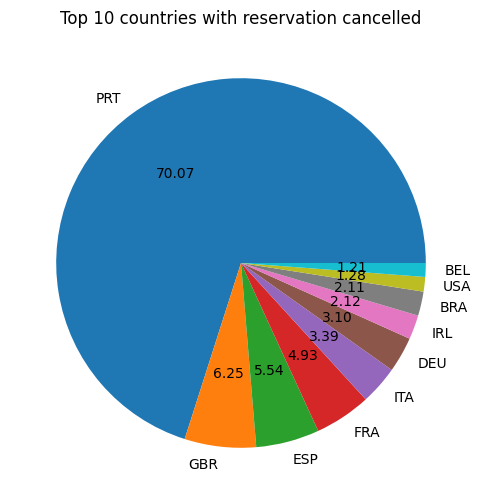

In [37]:
cancelled_data = df[df['is_canceled'] == 1] #filtered data of is_canceled
top_10_country = cancelled_data['country'].value_counts()[:10] #country column is there in the data set(check using df.column)
#how many times the value is coming in a column,it returns values in descending order
plt.figure(figsize = (6,6))
plt.title('Top 10 countries with reservation cancelled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index) #we will show values to 2 decimal points only so "%.2f"
plt.show()

**Portugal country(PTR) has seen highest cancellation upto 70%**,so if we want to give any suggestion to the hotel in portugal country,they should increase their facilties,correct their price(reduce price),give promtional discounts or run campaign,advertisement marketing should be done more to decrease the cancellation.

1. **let's see the clients are they coming from online/offline travel agent**

In [42]:
df['market_segment'].value_counts() #market_segment cols value we are checking

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

we can see % format of these values by using normalize = True

In [43]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

**we can see that around 20% are coming from offline travel agent to the hotel**

In [44]:
#let's check the same for cancelled data for market_segment
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

**we can see that around 47% of cancellations are coming from online travel agent** but if we observe reservation is happening online but out of that also 47% is getting cancelled the reason of it can be that when they actually went and saw hotel was not good as it was written online.